In this notebook we reproduce experiments from Section 4.2 in Jacob's write up. We check and analyze if connection between parents impact the entropy of the child. 3 parent connection types are considered: no connections, simplex connections and full connections (including loops).

In [1]:
# imports
%matplotlib inline
from brian2 import *
import dit
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import gen_connections
import simulation
import new_it_analyzer


First generate the experiment, each box correspond to one parent connection type.

In [40]:
#To run this script, you need to have a folder at location PATH_TO_DIR available, 
#and it must contain a 'raster' folder as well. The simulations take a while, 
#reduce N_MONTE_CARLO to make it faster bu less stable. 

PATH_TO_DIR = f'observations/entropy_and_parents/disconnected/'
N_MONTE_CARLO = 500
disconnected_xaxis = list(range(1,20))+list(np.arange(21,200, 10))

#Star shapped directed inwards. For each parent neuron, one synapse is pointing towards the child indexed by 0.
for nb_parents in disconnected_xaxis:
    nb_neurons=nb_parents+1
    synapse_weight=10
    pre_syn=[i for i in range(1, nb_parents+1)]
    pos_syn=[0 for x in pre_syn]
    
    #First initialize, then simulate, then make raster plot.
    ex=simulation.Simulation(nb_neurons, 10, 50, pre_syn, pos_syn, 'parents_{}_child_1'.format(nb_parents), stim='off')
    ex.simulate(N_MONTE_CARLO, PATH_TO_DIR)
    ex.run_and_plot_example_raster(PATH_TO_DIR+'raster/')
    

#If you run this several time, try to remember which nb_parents you ran! 
#To not do the same experiment twice, and to plot things more easily
disconnected_xaxis = list(range(1,20))+list(np.arange(21,200, 5))

In [11]:
#same but simplex connection

#To run this script, you need to have a folder at location PATH_TO_DIR available, 
#and it must contain a 'raster' folder as well.

PATH_TO_DIR = f'observations/entropy_and_parents/simplex/'
N_MONTE_CARLO = 500
simplex_xaxis = np.arange(1, 200, 10)
np.arange(101, 200, 5)#np.arange(1,100,5)

#Star shapped directed inwards. For each parent neuron, one synapse is pointing towards the child indexed by 0.
for nb_parents in simplex_xaxis:
    nb_neurons=nb_parents+1
    synapse_weight=10
    
    #for parent child connections
    pre_syn=[i for i in range(1, nb_parents+1)] 
    pos_syn=[0 for x in pre_syn]
    
    #for inter-parent connections
    simplex_pre_syn, simplex_pos_syn = gen_connections.simplex(nb_parents) #for parent parent connec
    pre_syn+=[x+1 for x in simplex_pre_syn]
    pos_syn+=[x+1 for x in simplex_pos_syn]
    
    ex=simulation.Simulation(nb_neurons, 10, 50, pre_syn, pos_syn, 'parents_{}_child_1'.format(nb_parents), stim='off')
    ex.simulate(N_MONTE_CARLO, PATH_TO_DIR)
    ex.run_and_plot_example_raster(PATH_TO_DIR+'raster/')
    

#If you run this several time, try to remember which nb_parents you ran!
#To not do the same experiment twice, and to plot things more easily
simplex_xaxis= np.arange(1, 200, 10)

In [15]:
#same but full connection

#To run this script, you need to have a folder at location PATH_TO_DIR available, 
#and it must contain a 'raster' folder as well.

PATH_TO_DIR = f'observations/entropy_and_parents/full/'
N_MONTE_CARLO = 500
#full_xaxis = list(range(1,30))+list(np.arange(30,100,5))
full_xaxis = np.arange(100,200, 10)


#Star shapped directed inwards. For each parent neuron, one synapse is pointing towards the child indexed by 0.
for nb_parents in full_xaxis:
    nb_neurons=nb_parents+1
    synapse_weight=10
    
    #for parent child connections
    pre_syn=[i for i in range(1, nb_parents+1)] 
    pos_syn=[0 for x in pre_syn]
    
    #for inter-parent connections
    full_pre_syn, full_pos_syn = gen_connections.full(nb_parents) 
    pre_syn+=[x+1 for x in full_pre_syn]
    pos_syn+=[x+1 for x in full_pos_syn]
    
    ex=simulation.Simulation(nb_neurons, 10, 50, pre_syn, pos_syn, 'parents_{}_child_1'.format(nb_parents), stim='off')
    ex.simulate(N_MONTE_CARLO, PATH_TO_DIR)
    ex.run_and_plot_example_raster(PATH_TO_DIR+'raster/')
    

In [39]:
#same but tori connection

#To run this script, you need to have a folder at location PATH_TO_DIR available, 
#and it must contain a 'raster' folder as well.

PATH_TO_DIR = f'observations/entropy_and_parents/torus/'
N_MONTE_CARLO = 500
torus_xaxis=[x*x for x in np.arange(1,20,1)]

#Star shapped directed inwards. For each parent neuron, one synapse is pointing towards the child indexed by 0.
for nb_parents in np.arange(10,20,1):
    nb_neurons=nb_parents*nb_parents+1
    synapse_weight=10
    
    #for parent child connections
    pre_syn=[i for i in range(1, nb_parents*nb_parents+1)] #for parent child conn
    pos_syn=[0 for x in pre_syn]
    
    #for inter-parent connections
    tori_pre_syn, tori_pos_syn = gen_connections.torus(nb_parents, nb_parents) 
    pre_syn+=[x+1 for x in tori_pre_syn]
    pos_syn+=[x+1 for x in tori_pos_syn]
    
    ex=simulation.Simulation(nb_neurons, 10, 50, pre_syn, pos_syn, 'parents_{}_child_1'.format(nb_parents*nb_parents), stim='off')
    ex.simulate(N_MONTE_CARLO, PATH_TO_DIR)
    ex.run_and_plot_example_raster(PATH_TO_DIR+'raster/')
    

    

Now we plot some information measures. An example is Figure 7 in Section 4.2.

In [6]:
#These are the methods we use to plot things: 
def generate_child_entropy(connection_type, xaxis):
    PATH_TO_DIR = 'observations/entropy_and_parents/'+connection_type+'/'
    analyzs=[new_it_analyzer.IT_analyzer(PATH_TO_DIR+'parents_{}_child_1_nb_neur_{}_sw_10_tbs_50_stim_off'.format(i, i+1)) for i in xaxis]
    child_entropy=[np.mean([dit.shannon.entropy(d, [0], rv_mode='indices') for d in analyz.dists]) for analyz in analyzs]
    return child_entropy

def get_mean_firing_child(connection_type, xaxis):
    PATH_TO_DIR = 'observations/entropy_and_parents/'+connection_type+'/'
    analyzs=[new_it_analyzer.IT_analyzer(PATH_TO_DIR+'parents_{}_child_1_nb_neur_{}_sw_10_tbs_50_stim_off'.format(i, i+1)) for i in xaxis]
    means=[np.mean([get_mean(d)[0] for d in analyz.dists]) for analyz in analyzs ]
    return means
    

def get_mean(dist):
    mean=0
    for outcome in dist.outcomes:
        mean+=dist[outcome]*np.array(outcome)
    return mean

def generate_system_entropy(connection_type, xaxis):
    PATH_TO_DIR = 'observations/entropy_and_parents/'+connection_type+'/'
    analyzs=[new_it_analyzer.IT_analyzer(PATH_TO_DIR+'parents_{}_child_1_nb_neur_{}_sw_10_tbs_50_stim_off'.format(i, i+1)) for i in xaxis]
    system_entropy=[np.mean([dit.shannon.entropy(d, list(range(1,analyz.nb_neurons)), rv_mode='indices') for d in analyz.dists]) for analyz in analyzs]
    return system_entropy

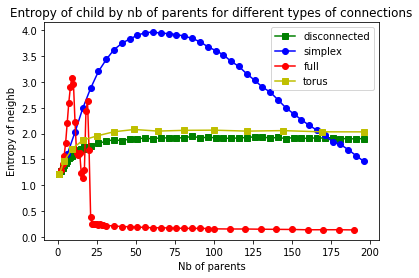

In [4]:
#here we plot. This will take a while
disconnected_xaxis = list(range(1,20))+list(np.arange(21,200, 5))
torus_xaxis=[x*x for x in np.arange(1,15,1)]
simplex_xaxis = np.arange(1,200,5)
full_xaxis = list(range(1,30))+list(np.arange(31,100,5))+list(np.arange(100,200, 10))
full_no_loops_xaxis = list(np.arange(1,20, 1))+list(np.arange(30,60,5))


plt.title('Entropy of child by nb of parents for different types of connections')


plt.plot(disconnected_xaxis, generate_child_entropy('disconnected', disconnected_xaxis), 'gs-', label = 'disconnected')
plt.plot(simplex_xaxis, generate_child_entropy('simplex', simplex_xaxis), 'bo-', label = 'simplex')
plt.plot(full_xaxis, generate_child_entropy('full', full_xaxis), 'ro-', label = 'full')
plt.plot(torus_xaxis, generate_child_entropy('torus', torus_xaxis), 'ys-', label = 'torus' )


plt.ylabel('Entropy of neighb')
plt.xlabel('Nb of parents')

plt.legend()

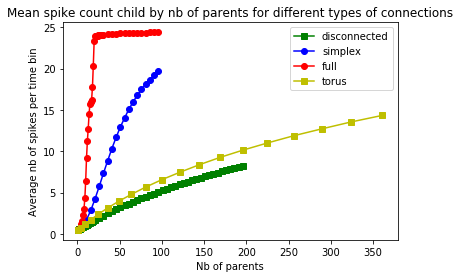

In [5]:
#here we plot the mean spike count as a function of nb parents for diff conn types
disconnected_xaxis = list(range(1,20))+list(np.arange(21,200, 5))
torus_xaxis=[x*x for x in np.arange(1,20,1)]
simplex_xaxis = np.arange(1,100,5)
full_xaxis = list(range(1,30))+list(np.arange(31,100,5))


plt.title('Mean spike count child by nb of parents for different types of connections')

plt.plot(disconnected_xaxis, get_mean_firing_child('disconnected', disconnected_xaxis), 'gs-', label = 'disconnected')
plt.plot(simplex_xaxis, get_mean_firing_child('simplex', simplex_xaxis), 'bo-', label = 'simplex')
plt.plot(full_xaxis, get_mean_firing_child('full', full_xaxis), 'ro-', label = 'full')
plt.plot(torus_xaxis, get_mean_firing_child('torus', torus_xaxis), 'ys-', label = 'torus' )


plt.ylabel('Average nb of spikes per time bin')
plt.xlabel('Nb of parents')

plt.legend()